In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
simple_test_case = pd.read_csv("dataset/simple_test_case/data_0.csv")
simple_test_case

,id,gender,age,count,from_date,to_date
0,0,man,young,3,2024-01-08 08:00:00,2024-01-08 09:00:00
1,1,man,adult,28,2024-01-08 08:00:00,2024-01-08 09:00:00
2,2,man,old,10,2024-01-08 08:00:00,2024-01-08 09:00:00
3,3,woman,young,5,2024-01-08 08:00:00,2024-01-08 09:00:00
4,4,woman,adult,44,2024-01-08 08:00:00,2024-01-08 09:00:00
...,...,...,...,...,...,...
667,625,man,adult,162,2024-01-15 21:00:00,2024-01-15 22:00:00
668,626,man,old,62,2024-01-15 21:00:00,2024-01-15 22:00:00
669,627,woman,young,33,2024-01-15 21:00:00,2024-01-15 22:00:00
670,628,woman,adult,262,2024-01-15 21:00:00,2024-01-15 22:00:00


In [3]:
simple_test_case.dtypes

id            int64
gender       object
age          object
count         int64
from_date    object
to_date      object
dtype: object

In [4]:
simple_test_case['gender'] = simple_test_case['gender'].astype('category')

simple_test_case['age'] = simple_test_case['age'].astype('category')

simple_test_case['from_date'] = pd.to_datetime(simple_test_case['from_date'])
simple_test_case['to_date'] = pd.to_datetime(simple_test_case['to_date'])

simple_test_case.dtypes

id                    int64
gender             category
age                category
count                 int64
from_date    datetime64[ns]
to_date      datetime64[ns]
dtype: object

In [5]:
#Calculate the store daily visits
simple_test_case['visits_date'] = simple_test_case['from_date'].dt.date

store_daily_visits = simple_test_case.groupby('visits_date')['count'].sum().reset_index(drop=False, name='store_daily_visits')

store_daily_visits

,visits_date,store_daily_visits
0,2024-01-08,12782
1,2024-01-09,13145
2,2024-01-10,13628
3,2024-01-11,13973
4,2024-01-12,15013
5,2024-01-13,13481
6,2024-01-14,26104
7,2024-01-15,14857


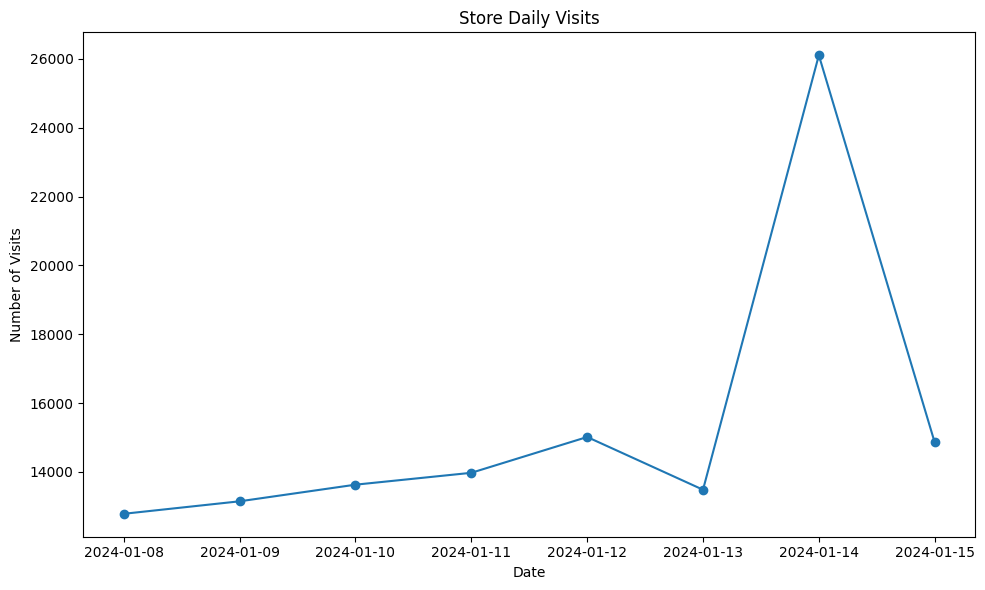

In [6]:
#Visualization
plt.figure(figsize=(10,6))
plt.plot(store_daily_visits['visits_date'], store_daily_visits['store_daily_visits'], marker='o', linestyle='-')
plt.title('Store Daily Visits')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.tight_layout()
plt.show()

In [7]:
#Calculate the gender repartitions in the store daily visits
gender_repartitions = simple_test_case.groupby(['visits_date', 'gender'])['count'].sum().reset_index(drop=False, name='store_daily_visits')

gender_repartitions

/tmp/ipykernel_50629/3825246289.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_repartitions = simple_test_case.groupby(['visits_date', 'gender'])['count'].sum().reset_index(drop=False, name='store_daily_visits')


,visits_date,gender,store_daily_visits
0,2024-01-08,man,5167
1,2024-01-08,woman,7615
2,2024-01-09,man,5420
3,2024-01-09,woman,7725
4,2024-01-10,man,5307
5,2024-01-10,woman,8321
6,2024-01-11,man,5395
7,2024-01-11,woman,8578
8,2024-01-12,man,6047
9,2024-01-12,woman,8966


<Figure size 1000x600 with 0 Axes>

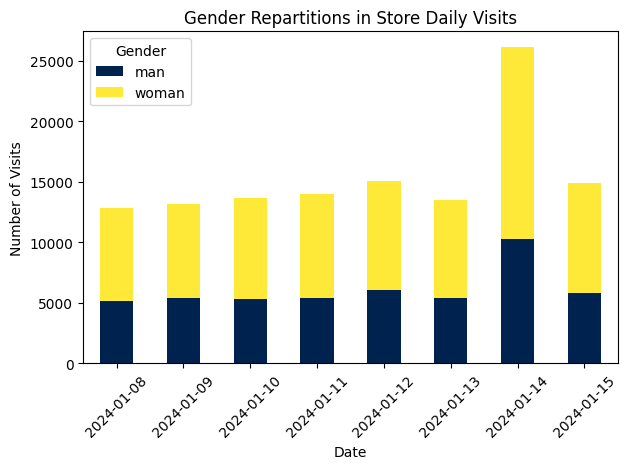

In [8]:
pivot_gender_repartitions = gender_repartitions.pivot(index='visits_date', columns='gender', values='store_daily_visits').fillna(0)

plt.figure(figsize=(10, 6))
pivot_gender_repartitions.plot(kind='bar', stacked=True, colormap='cividis')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Gender Repartitions in Store Daily Visits')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [9]:
#Calculate the proportion of young, adult and older people in the store daily visits
proportion = simple_test_case.groupby(['visits_date', 'age'])['count'].sum().reset_index()

proportions_by_age = proportion.pivot(index='visits_date', columns='age', values='count')

store_daily_visits = proportions_by_age.sum(axis=1)

proportions_by_age['daily_visits'] = store_daily_visits
proportions_by_age['young'] = proportions_by_age['young'] / proportions_by_age['daily_visits']
proportions_by_age['adult'] = proportions_by_age['adult'] / proportions_by_age['daily_visits']
proportions_by_age['old'] = proportions_by_age['old'] / proportions_by_age['daily_visits']

age_proportions = proportions_by_age[['young', 'adult', 'old']]

print(age_proportions)

age             young     adult       old
visits_date                              
2024-01-08   0.106165  0.661790  0.232045
2024-01-09   0.098973  0.635375  0.265652
2024-01-10   0.108527  0.673907  0.217567
2024-01-11   0.092822  0.662993  0.244185
2024-01-12   0.109305  0.646906  0.243789
2024-01-13   0.097619  0.676730  0.225651
2024-01-14   0.109830  0.645227  0.244943
2024-01-15   0.088645  0.649593  0.261762


/tmp/ipykernel_50629/65412037.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion = simple_test_case.groupby(['visits_date', 'age'])['count'].sum().reset_index()


<Figure size 1000x600 with 0 Axes>

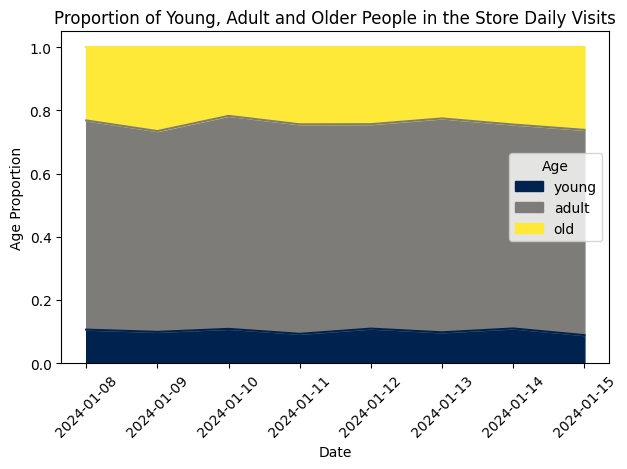

In [10]:
#Visualization
plt.figure(figsize=(10, 6))
age_proportions.plot(kind='area', stacked=True, colormap='cividis')
plt.xlabel('Date')
plt.ylabel('Age Proportion')
plt.title('Proportion of Young, Adult and Older People in the Store Daily Visits')
plt.xticks(rotation=45)
plt.legend(title='Age')
plt.tight_layout()
plt.show()

In [11]:
#Calculate the proportion of young, adult and older people in the store daily visits
proportion = simple_test_case.groupby(['visits_date', 'gender'])['count'].sum().reset_index()

proportions_by_gender = proportion.pivot(index='visits_date', columns='gender', values='count')

store_daily_visits = proportions_by_gender.sum(axis=1)

proportions_by_gender['daily_visits'] = store_daily_visits
proportions_by_gender['man'] = proportions_by_gender['man'] / proportions_by_gender['daily_visits']
proportions_by_gender['woman'] = proportions_by_gender['woman'] / proportions_by_gender['daily_visits']

gender_proportions = proportions_by_gender[['man', 'woman']]

print(gender_proportions)

gender            man     woman
visits_date                    
2024-01-08   0.404240  0.595760
2024-01-09   0.412324  0.587676
2024-01-10   0.389419  0.610581
2024-01-11   0.386102  0.613898
2024-01-12   0.402784  0.597216
2024-01-13   0.397374  0.602626
2024-01-14   0.391434  0.608566
2024-01-15   0.388706  0.611294


/tmp/ipykernel_50629/1212264084.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion = simple_test_case.groupby(['visits_date', 'gender'])['count'].sum().reset_index()


<Figure size 1000x600 with 0 Axes>

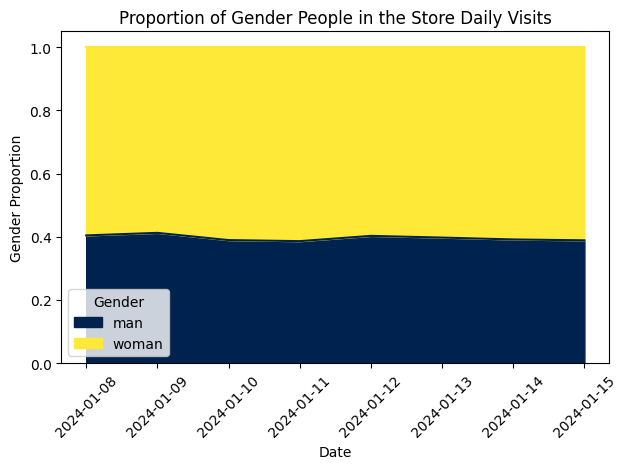

In [12]:
#Visualization
plt.figure(figsize=(10, 6))
gender_proportions.plot(kind='area', stacked=True, colormap='cividis')
plt.xlabel('Date')
plt.ylabel('Gender Proportion')
plt.title('Proportion of Gender People in the Store Daily Visits')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Some incidents happens while this dataset was produced, affecting the data reliability. Implement analysis to identify these errors.

In [13]:
path = glob.glob('dataset/real_test_case/*.csv')

data_files = [pd.read_csv(file) for file in path]

real_test_case = pd.concat(data_files, ignore_index=True)

real_test_case

,id,gender,age,count,from_date,to_date
0,440,man,old,5,2024-01-13 16:00:00,2024-01-13 17:00:00
1,441,woman,young,84,2024-01-13 16:00:00,2024-01-13 17:00:00
2,442,woman,adult,503,2024-01-13 16:00:00,2024-01-13 17:00:00
3,443,woman,old,7,2024-01-13 16:00:00,2024-01-13 17:00:00
4,444,man,young,130,2024-01-13 17:00:00,2024-01-13 18:00:00
...,...,...,...,...,...,...
2347,1092,man,young,46,2024-01-21 21:00:00,2024-01-21 22:00:00
2348,1093,man,adult,345,2024-01-21 21:00:00,2024-01-21 22:00:00
2349,1094,man,old,109,2024-01-21 21:00:00,2024-01-21 22:00:00
2350,1095,woman,young,13,2024-01-21 21:00:00,2024-01-21 22:00:00


In [14]:
real_test_case[real_test_case['id'] == 0]

,id,gender,age,count,from_date,to_date
1647,0,man,young,4,2024-01-08 08:00:00,2024-01-08 09:00:00


In [15]:
real_test_case['from_date'] = pd.to_datetime(real_test_case['from_date'])

data_samples = real_test_case.resample('D', on = 'from_date').mean()

plt.figure(figsize=(10, 6))
plt.plot(data_samples.index, data_samples['count'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Store Visits')
plt.title('Daily Store Visits')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [16]:
#Checking for missing values
missing_vals = real_test_case.isnull().sum()
missing_vals

id           0
gender       0
age          0
count        0
from_date    0
to_date      0
dtype: int64

In [17]:
#Checking for duplicates
duplicates = real_test_case[real_test_case.duplicated()]
duplicates

,id,gender,age,count,from_date,to_date


In [18]:
#Check data types
dttypes = real_test_case.dtypes
dttypes

id                    int64
gender               object
age                  object
count                 int64
from_date    datetime64[ns]
to_date              object
dtype: object

In [19]:
#Data Conversion
real_test_case['to_date'] = pd.to_datetime(real_test_case['to_date'])
real_test_case['gender'] = real_test_case['gender'].astype('category')
real_test_case['age'] = real_test_case['age'].astype('category')

real_test_case.dtypes

id                    int64
gender             category
age                category
count                 int64
from_date    datetime64[ns]
to_date      datetime64[ns]
dtype: object

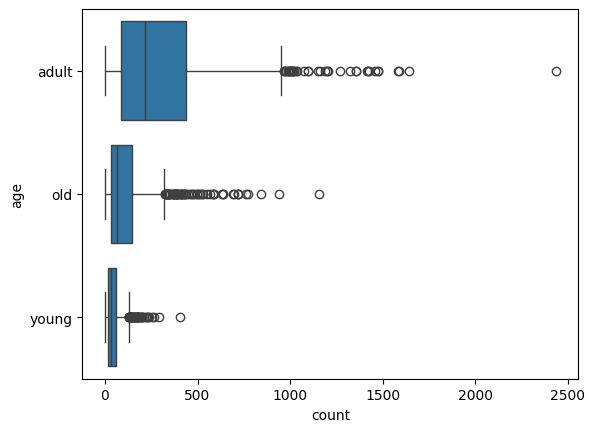

In [20]:
#Checking for outliers
import seaborn as sns

#real_test_case.boxplot(by='age', column=['count'])
sns.boxplot(x=real_test_case['count'], y=real_test_case['age'])
plt.show()

In [21]:
from scipy.stats import zscore

real_test_case['score'] = zscore(real_test_case['count'])
outliers = real_test_case[real_test_case['score'].abs() > 3]
outliers

,id,gender,age,count,from_date,to_date,score
8,448,woman,adult,883,2024-01-13 17:00:00,2024-01-13 18:00:00,3.199815
11,451,man,adult,874,2024-01-13 18:00:00,2024-01-13 19:00:00,3.160115
14,454,woman,adult,1475,2024-01-13 18:00:00,2024-01-13 19:00:00,5.811169
17,457,man,adult,1037,2024-01-13 19:00:00,2024-01-13 20:00:00,3.879120
20,460,woman,adult,1641,2024-01-13 19:00:00,2024-01-13 20:00:00,6.543407
26,466,woman,adult,1015,2024-01-13 20:00:00,2024-01-13 21:00:00,3.782076
92,526,woman,adult,874,2024-01-14 17:00:00,2024-01-14 18:00:00,3.160115
98,532,woman,adult,943,2024-01-14 18:00:00,2024-01-14 19:00:00,3.464479
104,538,woman,adult,1355,2024-01-14 19:00:00,2024-01-14 20:00:00,5.281841
173,601,man,adult,951,2024-01-15 17:00:00,2024-01-15 18:00:00,3.499768


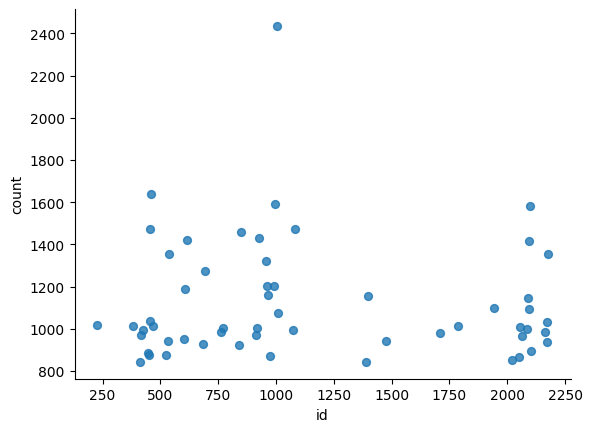

In [22]:
from matplotlib import pyplot as plt
outliers.plot(kind='scatter', x='id', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

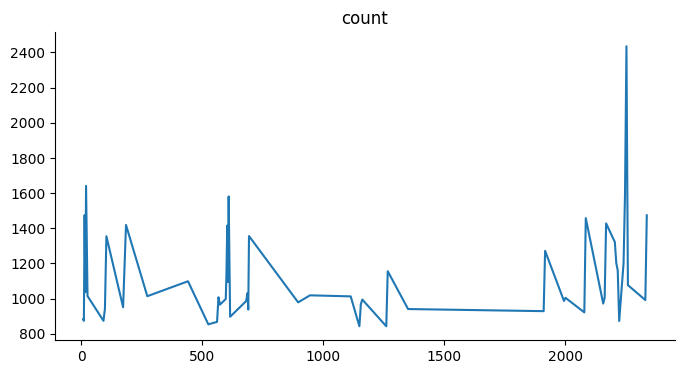

In [23]:
from matplotlib import pyplot as plt
outliers['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

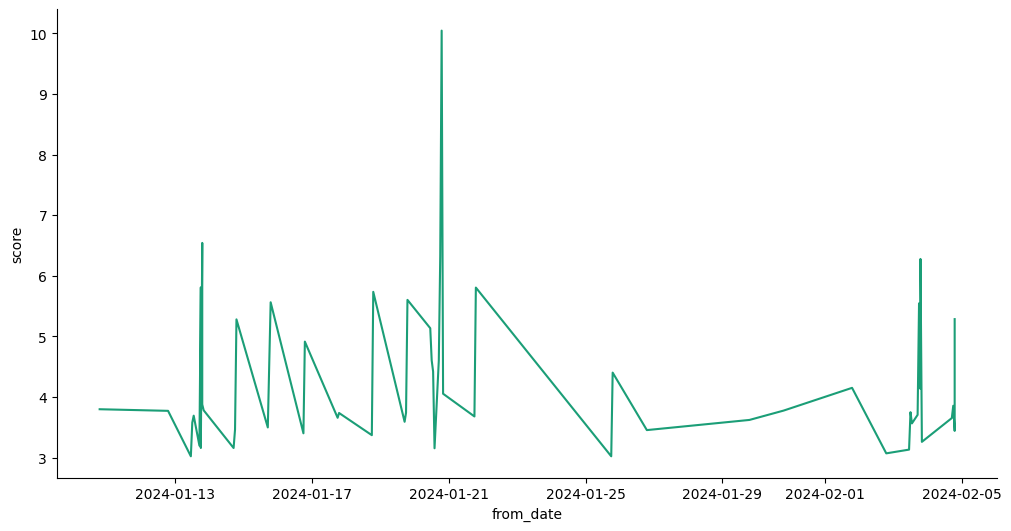

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['from_date']
  ys = series['score']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = outliers.sort_values('from_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('from_date')
_ = plt.ylabel('score')

In [25]:
def check_nulls(df, column_name):
    return df[column_name].isnull().sum()

In [26]:
def check_data_type(df, column_name, expected_type):
    return df[column_name].dtype == expected_type

In [27]:
def check_value_set(df, column_name, expected_set):
    return set(df[column_name].unique()).issubset(expected_set)

In [28]:
def check_value_range(df, column_name, min_value=None, max_value=None):
    if min_value is not None and max_value is not None:
        return df[(df[column_name] >= min_value) & (df[column_name] <= max_value)]
    elif min_value is not None:
        return df[df[column_name] >= min_value]
    elif max_value is not None:
        return df[df[column_name] <= max_value]
    else:
        return df

In [30]:
print("Null checks for 'id':", check_nulls(real_test_case, 'id'))

Null checks for 'id': 0


In [31]:
print("Data type check for 'id':", check_data_type(real_test_case, 'id', 'int64'))

Data type check for 'id': True


In [32]:
print("Gender value set check:", check_value_set(real_test_case, 'gender', {'woman', 'man'}))

Gender value set check: True


In [33]:
print("Age value set check:", check_value_set(real_test_case, 'age', {'young', 'adult', 'old'}))

Age value set check: True


In [34]:
print("Count value range check:", check_value_range(real_test_case, 'count', 0, None))

Count value range check:         id gender    age  count           from_date             to_date  \
0      440    man    old      5 2024-01-13 16:00:00 2024-01-13 17:00:00   
1      441  woman  young     84 2024-01-13 16:00:00 2024-01-13 17:00:00   
2      442  woman  adult    503 2024-01-13 16:00:00 2024-01-13 17:00:00   
3      443  woman    old      7 2024-01-13 16:00:00 2024-01-13 17:00:00   
4      444    man  young    130 2024-01-13 17:00:00 2024-01-13 18:00:00   
...    ...    ...    ...    ...                 ...                 ...   
2347  1092    man  young     46 2024-01-21 21:00:00 2024-01-21 22:00:00   
2348  1093    man  adult    345 2024-01-21 21:00:00 2024-01-21 22:00:00   
2349  1094    man    old    109 2024-01-21 21:00:00 2024-01-21 22:00:00   
2350  1095  woman  young     13 2024-01-21 21:00:00 2024-01-21 22:00:00   
2351  1096  woman  adult     99 2024-01-21 21:00:00 2024-01-21 22:00:00   

         score  
0    -0.673107  
1    -0.324632  
2     1.523607  
3    -

In [35]:
Q1 = real_test_case['count'].quantile(0.25)
Q3 = real_test_case['count'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = real_test_case[(real_test_case['count'] < lower_bound) | (real_test_case['count'] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
         id gender    age  count           from_date             to_date  \
2      442  woman  adult    503 2024-01-13 16:00:00 2024-01-13 17:00:00   
5      445    man  adult    692 2024-01-13 17:00:00 2024-01-13 18:00:00   
8      448  woman  adult    883 2024-01-13 17:00:00 2024-01-13 18:00:00   
11     451    man  adult    874 2024-01-13 18:00:00 2024-01-13 19:00:00   
14     454  woman  adult   1475 2024-01-13 18:00:00 2024-01-13 19:00:00   
...    ...    ...    ...    ...                 ...                 ...   
2324  1069    man  adult    824 2024-01-21 17:00:00 2024-01-21 18:00:00   
2330  1075    man  adult    992 2024-01-21 18:00:00 2024-01-21 19:00:00   
2336  1081    man  adult   1474 2024-01-21 19:00:00 2024-01-21 20:00:00   
2339  1084  woman  adult    451 2024-01-21 19:00:00 2024-01-21 20:00:00   
2342  1087    man  adult    651 2024-01-21 20:00:00 2024-01-21 21:00:00   

         score  
2     1.523607  
5     2.357300  
8     3.199815  
11    3.160115  
14 

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'count' is your time series and it's indexed by datetime
result = seasonal_decompose(real_test_case['count'], model='additive', period=24)  # daily seasonality

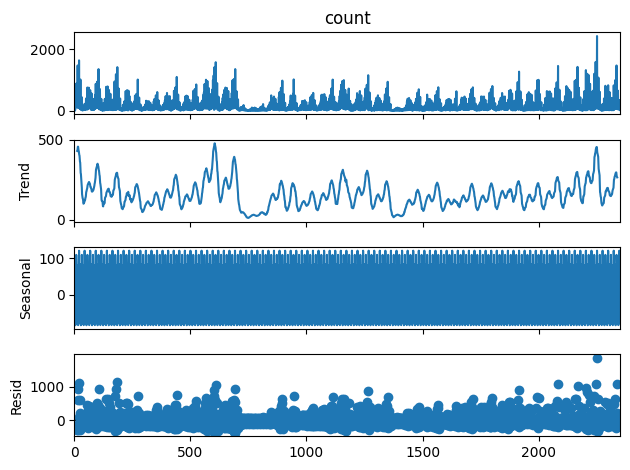

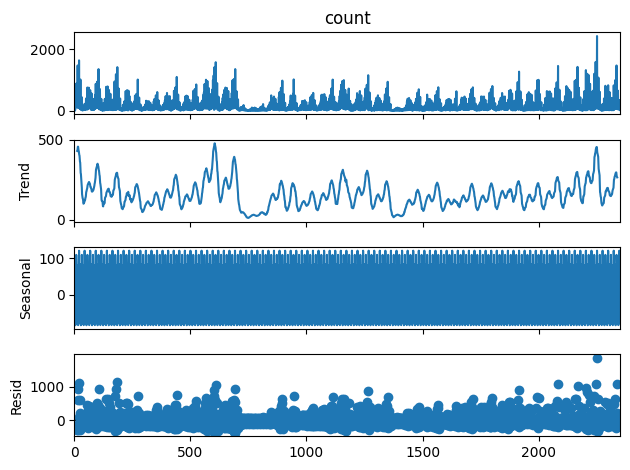

In [37]:
result.plot()

In [38]:
from sklearn.ensemble import IsolationForest

# Assuming 'count' is the feature you're analyzing
clf = IsolationForest(random_state=42)
real_test_case['outlier'] = clf.fit_predict(real_test_case[['count']])

In [39]:
real_test_case['outlier'] = real_test_case['outlier'] == -1

In [40]:
real_test_case

,id,gender,age,count,from_date,to_date,score,outlier
0,440,man,old,5,2024-01-13 16:00:00,2024-01-13 17:00:00,-0.673107,False
1,441,woman,young,84,2024-01-13 16:00:00,2024-01-13 17:00:00,-0.324632,False
2,442,woman,adult,503,2024-01-13 16:00:00,2024-01-13 17:00:00,1.523607,True
3,443,woman,old,7,2024-01-13 16:00:00,2024-01-13 17:00:00,-0.664285,False
4,444,man,young,130,2024-01-13 17:00:00,2024-01-13 18:00:00,-0.121723,False
...,...,...,...,...,...,...,...,...
2347,1092,man,young,46,2024-01-21 21:00:00,2024-01-21 22:00:00,-0.492253,False
2348,1093,man,adult,345,2024-01-21 21:00:00,2024-01-21 22:00:00,0.826658,True
2349,1094,man,old,109,2024-01-21 21:00:00,2024-01-21 22:00:00,-0.214355,False
2350,1095,woman,young,13,2024-01-21 21:00:00,2024-01-21 22:00:00,-0.637818,False


In [41]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

In [42]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Data Anomaly Dashboard"),
    dcc.Dropdown(
        id='category-dropdown',
        options=[
            {'label': 'Gender', 'value': 'gender'},
            {'label': 'Age', 'value': 'age'}
        ],
        value='gender',
        clearable=False,
    ),
    dcc.Graph(id='anomaly-graph'),
])

# Callback to update graph based on dropdown selection
@app.callback(
    Output('anomaly-graph', 'figure'),
    [Input('category-dropdown', 'value')]
)
def update_graph(selected_category):
    fig = px.line(real_test_case, x='from_date', y='count', color=selected_category,
                  title=f'Count Over Time by {selected_category.capitalize()}')
    fig.update_xaxes(title_text='Date')
    fig.update_yaxes(title_text='Count')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

/workspaces/test_technique/.venv/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/workspaces/test_technique/.venv/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [43]:
# Sample DataFrame (replace this with your actual DataFrame)
# Assuming df is already defined as in the previous example

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Data Anomaly Dashboard"),
    dcc.Dropdown(
        id='category-dropdown',
        options=[
            {'label': 'Gender', 'value': 'gender'},
            {'label': 'Age', 'value': 'age'}
        ],
        value='gender',
        clearable=False,
    ),
    dcc.Graph(id='time-series-graph'),
    dcc.Graph(id='histogram-graph'),
    dcc.Graph(id='pie-chart-graph'),
    dcc.Graph(id='heatmap-graph'),
])

# Callback to update time series graph based on dropdown selection
@app.callback(
    Output('time-series-graph', 'figure'),
    [Input('category-dropdown', 'value')]
)
def update_time_series(selected_category):
    fig = px.line(real_test_case, x='from_date', y='count', color=selected_category,
                  title=f'Count Over Time by {selected_category.capitalize()}')
    fig.update_xaxes(title_text='Date')
    fig.update_yaxes(title_text='Count')
    return fig

# Callback to update histogram
@app.callback(
    Output('histogram-graph', 'figure'),
    [Input('category-dropdown', 'value')]
)
def update_histogram(selected_category):
    fig = px.histogram(real_test_case, x='count', color=selected_category,
                       title=f'Distribution of Count by {selected_category.capitalize()}')
    return fig

# Callback to update pie chart
@app.callback(
    Output('pie-chart-graph', 'figure'),
    [Input('category-dropdown', 'value')]
)
def update_pie_chart(selected_category):
    fig = px.pie(real_test_case, names=selected_category, title=f'Proportion by {selected_category.capitalize()}')
    return fig

# Callback to update heatmap
@app.callback(
    Output('heatmap-graph', 'figure'),
    [Input('category-dropdown', 'value')]
)
def update_heatmap(selected_category):
    # Ensure 'from_date' is in datetime format
    real_test_case['from_date'] = pd.to_datetime(real_test_case['from_date'])
    
    # Now that 'from_date' is guaranteed to be datetime-like, we can safely use .dt
    real_test_case['hour'] = real_test_case['from_date'].dt.hour
    real_test_case['day'] = real_test_case['from_date'].dt.date
    heatmap_data = real_test_case.groupby(['day', 'hour']).size().unstack(fill_value=0)
    
    fig = px.imshow(heatmap_data, labels=dict(x="Hour of Day", y="Date", color="Report Count"),
                    title="Heatmap of Report Frequency by Day and Hour")
    fig.update_xaxes(side="top")
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

/workspaces/test_technique/.venv/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/workspaces/test_technique/.venv/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/workspaces/test_technique/.venv/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/workspaces/test_technique/.venv/lib/python3.10/s